In [ ]:
!pip install azure-storage-blob

In [ ]:
#!pip install azure-storage-blob

import pandas as pd
from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

connection_string = "DefaultEndpointsProtocol=https;AccountName=mloblistorage;AccountKey=u+SGxSxdN+0KtUq2qwRS2zD+Ul4hBnt+nhAzPok53QggOuXa9+5V3VU8NDHiGmG2zN+ghQ7V+AtY+ASt8kPFcA==;EndpointSuffix=core.windows.net"
container_name ="mloblistoragecontainer"
blob_name = "properties_tienda_inglesa.csv"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

data = StringIO(csv_data)
df = pd.read_csv(data, header=None, names=['id','image_urls','images','link','product_name','property_type','source','url'])
#id,image_urls,images,link,product_name,property_type,source,url

valid_categories=["WAREHOUSE",
             "DRINKS",
            "CLEANING",
             "FROZEN",
            "TECHNOLOGY",
             "PERFUMERY"]


In [ ]:
df = df_filtrado = df.query('property_type in @valid_categories')
df = df[~df['id'].duplicated()]
df

,id,image_urls,images,link,product_name,property_type,source,url
0,29465,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Tapas-para-Em...,Tapas para Empanadas Hojaldradas TIENDA INGLES...,WAREHOUSE,tienda_inglesa,https://www.tiendainglesa.com.uy/Tapas-para-Em...
1,218557,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Galleta-Arroz...,Galleta Arroz CEREALITAS 160 gr,WAREHOUSE,tienda_inglesa,https://www.tiendainglesa.com.uy/Galleta-Arroz...
3,99775,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Refresco-PASO...,Refresco PASO DE LOS TOROS Pomelo sin Azúcar 1...,DRINKS,tienda_inglesa,https://www.tiendainglesa.com.uy/Refresco-PASO...
4,86019,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Pizza-con-Muz...,Pizza con Muzzarella y Tomate Pack Familiar SI...,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Pizza-con-Muz...
5,57950,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Papel-Higieni...,Papel Higiénico HIGIENOL Doble Hoja Premium 4 ...,FROZEN,tienda_inglesa,https://www.tiendainglesa.com.uy/Papel-Higieni...
...,...,...,...,...,...,...,...,...
25736,108410,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Calefon-JAMES...,Calefón JAMES 60 L,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Calefon-JAMES...
25737,301502,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Resma-de-Pape...,Resma de Papel para Impresora FANACOPY A4 75 gr,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Resma-de-Pape...
25738,461922,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Lavarropa-JAM...,Lavarropa JAMES Carga Frontal Blanco Display L...,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Lavarropa-JAM...
25739,536075,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Aire-Acondici...,Aire Acondicionado ECOSYSTEM 12000 BTU Inverte...,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Aire-Acondici...


In [ ]:
from keras import backend as K
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def plot_metric(history,target, title):
  plt.plot(history.history[target])
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel(target)
  plt.show()


def plot_fit(history):
  local_metrics=['loss','accuracy','f1_m','precision_m','recall_m']
  for x in local_metrics:
    plot_metric(history,x,f"{x} en train")

Epoch 1/5
156/156 [==============================] - 17s 60ms/step - loss: 1.0820 - accuracy: 0.5561 - f1_m: 3.2158 - precision_m: 288269248.0000 - recall_m: 2.0750
Epoch 2/5
156/156 [==============================] - 8s 54ms/step - loss: 0.2604 - accuracy: 0.9274 - f1_m: 1.0547 - precision_m: 1.0297 - recall_m: 1.0825
Epoch 3/5
156/156 [==============================] - 10s 61ms/step - loss: 0.1536 - accuracy: 0.9587 - f1_m: 1.0114 - precision_m: 0.9824 - recall_m: 1.0437
Epoch 4/5
156/156 [==============================] - 10s 62ms/step - loss: 0.1205 - accuracy: 0.9677 - f1_m: 1.0102 - precision_m: 0.9810 - recall_m: 1.0424
Epoch 5/5
156/156 [==============================] - 6s 41ms/step - loss: 0.1093 - accuracy: 0.9713 - f1_m: 0.9970 - precision_m: 0.9661 - recall_m: 1.0311


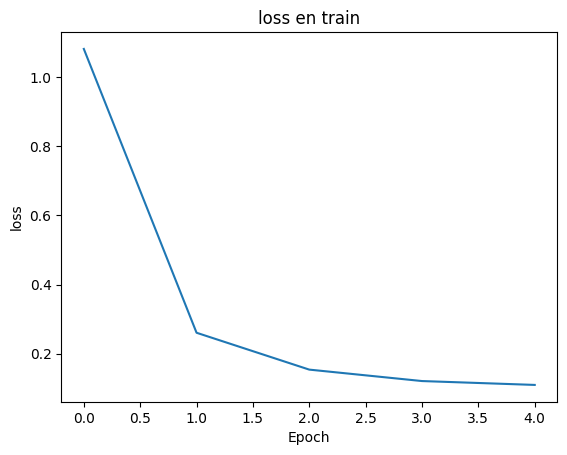

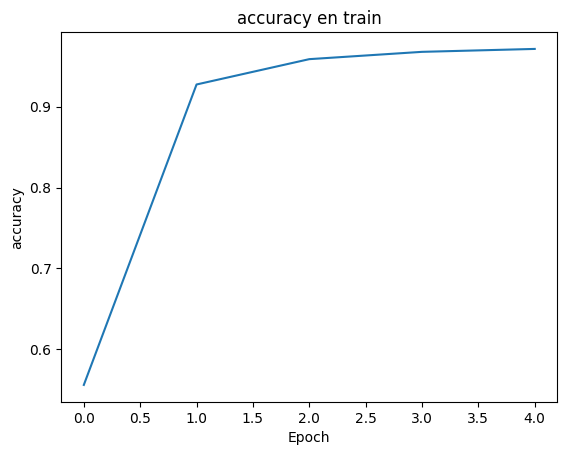

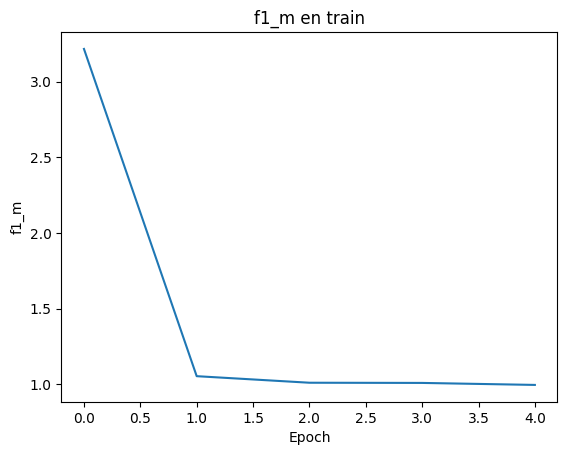

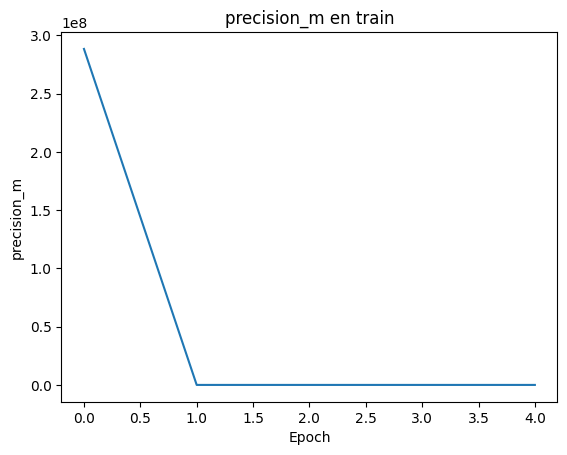

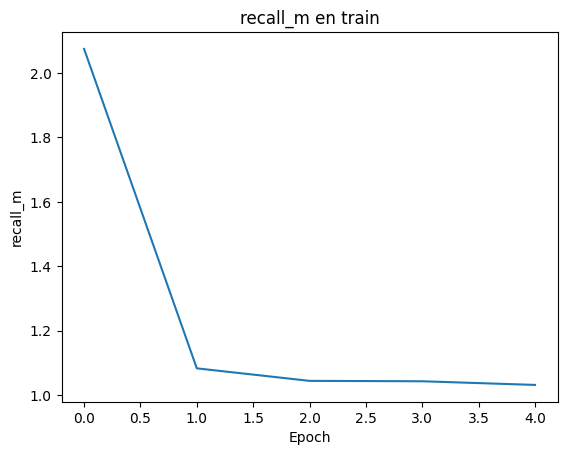

39/39 [==============================] - 1s 9ms/step - loss: 0.2632 - accuracy: 0.9246 - f1_m: 1.0154 - precision_m: 0.9849 - recall_m: 1.0487
Loss en el conjunto de prueba: 0.26316037774086
F1-Score en el conjunto de prueba: 1.0154153108596802
Precision en el conjunto de prueba: 0.9848530888557434
Recall en el conjunto de prueba: 1.0487009286880493
Accuracy en el conjunto de prueba: 0.9245585799217224


In [ ]:
, TextVectorization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, TextVectorization
from keras.optimizers import Adam


X = df['product_name']
y = df['property_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_words = 1000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max(len(sequence) for sequence in X_train_encoded)
vocab_size = len(tokenizer.word_index) + 1

X_train_padded = np.zeros((len(X_train_encoded), max_sequence_length))
X_test_padded = np.zeros((len(X_test_encoded), max_sequence_length))

for i, sequence in enumerate(X_train_encoded):
    X_train_padded[i, :len(sequence)] = sequence

for i, sequence in enumerate(X_test_encoded):
    X_test_padded[i, :len(sequence)] = sequence

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

embedding_dim = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(len(set(y_train_encoded)), activation='softmax'))

opt = Adam(learning_rate=0.001)


model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m,precision_m, recall_m])
fitted=model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)
plot_fit(fitted)



loss, accuracy,f1,precision,recall = model.evaluate(X_test_padded, y_test_encoded)
print(f"Loss en el conjunto de prueba: {loss}")
print(f"F1-Score en el conjunto de prueba: {f1}")
print(f"Precision en el conjunto de prueba: {precision}")
print(f"Recall en el conjunto de prueba: {recall}")
print(f"Accuracy en el conjunto de prueba: {accuracy}")


In [ ]:
new_text = ['paño de piso']

new_text_encoded = tokenizer.texts_to_sequences(new_text)

new_text_padded = np.zeros((len(new_text_encoded), max_sequence_length), dtype=np.int32)
for i, sequence in enumerate(new_text_encoded):
    length = min(len(sequence), max_sequence_length)
    new_text_padded[i, :length] = sequence[:length]

predicted_probabilities = model.predict(new_text_padded)
predicted_class = np.argmax(predicted_probabilities)
predicted_category = label_encoder.inverse_transform([predicted_class])[0]
print(f'Predicted category: {predicted_category}')

1/1 [==============================] - 0s 92ms/step
Predicted category: PERFUMERY
